![logotremplin.png](images/logotremplin.png)
![licence](images/Licence.jpg)

## Adaptation spectro : Capteur Adafruit AS7262

Utilisation du system STRETCH tremplin sur Rapsberry Pi 2 ou RaspBerry Pi3 B+

Le capteur : illustration du site adafruit 

![spectro6bandes](images/spectro6bandes.jpg)
![licence](images/Licence.jpg)

Le branchement : illustration du site adafruit

![Les branchemets sur le GPIO](images/BranchementsRaspiCapteur.jpg)
![licence](images/Licence.jpg)

Le principe est de relever le spectre de la lampe qui éclaire le capteur. 


## Import des modules nécessaires au fonctionnement 

Les modules python doivent être installés préalablement en utilisant la commande 

```
pip3 install adafruit-circuitpython-as726x
```
ou
```
pip install adafruit-circuitpython-as726x
```
si votre installation de python est la version 3 par défaut. 

Cette étape deviendra inutile lorsque le capteur disposera de sa librairie upm


## Les fonctions du module Adafruit_AS726x

Il suffit de saisir la commande suivante pour disposer de l'ensemble des fonctions accessibles dans la classe qui nous intéresse.

```
from adafruit_as726x import Adafruit_AS726x
help (Adafruit_AS726x)

```

## Vérification de la température du capteur 

[Le site adafruit](https://learn.adafruit.com/adafruit-as7262-6-channel-visible-light-sensor/circuitpython-wiring-test) pécise que si la température est comprise en 24 et 32 degrés Celsius, le capteur est correctement utilisé.

On peut donc vérifier ce point.

In [11]:
print('Temperature: {0} °C'.format(sensor.temperature))

Temperature: 26 °C


## Importation des modules nécessaire

À terme c'est un driver upm qui commandera le capteur. En attendant nous utilisons les modules recommandés sur le site ADAFRUIT.

In [3]:
import board
import busio
from adafruit_as726x import Adafruit_AS726x
     
i2c = busio.I2C(board.SCL, board.SDA)
sensor = Adafruit_AS726x(i2c)

## Affichage des valeurs mesurées 

Affichage sous forme d'une liste.

In [6]:
import time
sensor.conversion_mode = sensor.MODE_2
    
canaux=[sensor.violet,sensor.blue,sensor.green,sensor.yellow,sensor.orange,sensor.red]
longueurOnde=["450 nm","500 nm","550 nm","570 nm","600 nm","650 nm"]
couleur=["violet","bleu","vert","jaune","orange","rouge"]
for i in range (6):
    while not sensor.data_ready and i <= len(canaux):
        time.sleep(.1)
    canaux=[sensor.violet,sensor.blue,sensor.green,sensor.yellow,sensor.orange,sensor.red]    
    print("Intensité du canal ",longueurOnde[i]," ",couleur[i]," : {0} UA".format(canaux[i]))

Intensité du canal  450 nm   violet  : 9944.83984375 UA
Intensité du canal  500 nm   bleu  : 858.4832763671875 UA
Intensité du canal  550 nm   vert  : 1782.864990234375 UA
Intensité du canal  570 nm   jaune  : 1373.642578125 UA
Intensité du canal  600 nm   orange  : 2238.48681640625 UA
Intensité du canal  650 nm   rouge  : 10916.7890625 UA


## Affichage des valeurs mesurées

Affichage sur le LCD

In [8]:
#importation des modules et de la librairie upm du LCD
import mraa, time
from upm import pyupm_jhd1313m1 as jdm

bus1 = 0
lcdAddress = 0x3E
rgbAddress = 0x62

lcd = jdm.Jhd1313m1(bus1,lcdAddress,rgbAddress)

In [10]:
# print(canaux)
canauxchaine=str(canaux)
print(canauxchaine)
lcd.backlightOn()
lcd.setColor(148,0,211)
lcd.clear()
lcd.setCursor(1,16)
canaux0=str(canaux[0])
lcd.write(canaux0)
time.sleep(3)
lcd.setColor(0,0,255)
lcd.setCursor(1,16)
lcd.clear()
canaux1=str(canaux[1])
lcd.write(canaux1)
time.sleep(3)
lcd.setColor(0,255,0)
lcd.setCursor(1,16)
lcd.clear()
canaux2=str(canaux[2])
lcd.write(canaux2)
time.sleep(3)
lcd.setColor(255,255,0)
lcd.setCursor(1,16)
lcd.clear()
canaux3=str(canaux[3])
lcd.write(canaux3)
time.sleep(3)
lcd.setColor(255,165,0)
lcd.setCursor(1,16)
lcd.clear()
canaux4=str(canaux[4])
lcd.write(canaux4)
time.sleep(3)
lcd.setColor(255,0,0)
lcd.setCursor(1,16)
lcd.clear()
canaux5=str(canaux[5])
lcd.write(canaux5)
time.sleep(3)
lcd.clear()
lcd.backlightOff()

[9943.5888671875, 858.4832763671875, 1779.31103515625, 1373.642578125, 2237.433837890625, 10916.7890625]


0

## Premier affichage de spectre 

En lançant le programme ci-dessous vous devriez obtenir un premier affichage des intensité mesurées dans chacun des 6 canaux du spectro.

Choisissez un nombre de mesures et un temps de latence en secondes entre 2 mesures qui vous laisse le temps de placer un objet au dessus du capteur.

Le caractère "espace" est affiché avec un fond évoquant la couleur de sensibilité du canal [lien](https://i.stack.imgur.com/6otvY.png).

Les lignes de code ci-dessous permettent de valider le choix des couleurs.

Sont intégrées les ligne de code de matplotlib pour un diagramme en baton.

## Mise en place d'un code couleur pour l'affichage

On utilise donc les références de couleurs de fond de texte pour dessiner un spectre en couleur cohérent. 

In [12]:
#exemple de bandeau coloré
print('\x1b[6;39;45m' + ' = ' + '\x1b[0m')
print('\x1b[6;39;44m' + ' = ' + '\x1b[0m')
print('\x1b[6;30;42m' + ' = ' + '\x1b[0m')
print('\x1b[6;29;47m' + ' = ' + '\x1b[0m')
print('\x1b[6;30;43m' + ' = ' + '\x1b[0m')
print('\x1b[6;39;41m' + ' = ' + '\x1b[0m')

 = 
 = 
 = 
 = 
 = 
 = 


## Utilisation du code couleur et paramétrage de l'affichage de la mesure

Une fonction permet de ramener la mesure du capteur dans un affichage de 0 à 100 Unités Arbitraires.
On utilise matplotlib pour compléter l'affichage. 

On permet à l'utilisateur de décider du nombre de mesures et du délai entre deux mesures. 
L'utilisateur est invité à indiquer le nom de la source lumineuse qui servira de nom de fichier à la sauvéegarde effectuée par matplotlib du graphique. 

Précisez le nombre (entre 1 et 20) de cycles de mesures à réaliser : 2
Précisez le temps souhaité en secondes pour le délai entre deux mesures : 5
saisissez la source de lumière utilisée : Lampe de bureau puis halogene
Lampe de bureau puis halogene
[56, 4, 10, 8, 15, 52]


 450 nm :                                                         
 500 nm :     
 550 nm :           
 570 nm :         
 600 nm :                
 650 nm :                                                     




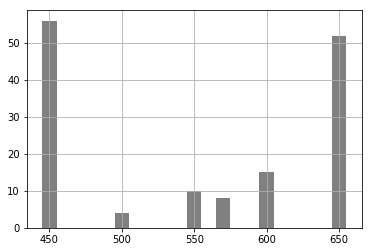

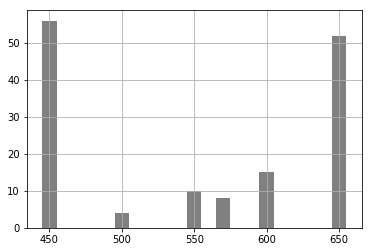

[1, 2, 8, 5, 3, 2]


 450 nm :  
 500 nm :   
 550 nm :         
 570 nm :      
 600 nm :    
 650 nm :   




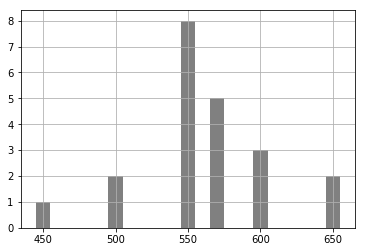

In [16]:
    import time
    import numpy as np
    import matplotlib.pyplot as plt
    import board
    import busio
     
    from adafruit_as726x import Adafruit_AS726x
    
    #maximum value for sensor reading
    max_val = 16000
     
    #max number of characters in each graph
    max_graph = 100
     
    def graph_map(x):
        return min(int(x * max_graph / max_val), max_graph)
    
    valeurs=[0]*6
    
    # Initialize I2C bus and sensor.
    i2c = busio.I2C(board.SCL, board.SDA)
    sensor = Adafruit_AS726x(i2c)
     
    sensor.conversion_mode = sensor.MODE_2
    
    # initialize e nombre de mesures 
    
    mesures = 0
    mesures = int(input("Précisez le nombre (entre 1 et 20) de cycles de mesures à réaliser : "))    
    
    # initialize le délai entre 2 mesures.
    delai=0
    delai = int(input("Précisez le temps souhaité en secondes pour le délai entre deux mesures : ")) 
    
    # Préciser la source de lumière
    Source =input("saisissez la source de lumière utilisée : ")
    print(Source)
#    for i in range(mesures):
#    while i <= mesures :
    valeurs=[graph_map(sensor.violet),graph_map(sensor.blue),graph_map(sensor.green),graph_map(sensor.yellow),graph_map(sensor.orange),graph_map(sensor.red)]
    
    for i in range(mesures) :  
            # Wait for data to be ready
        while not sensor.data_ready and i <= mesures:
            time.sleep(.1)
        valeurs=[graph_map(sensor.violet),graph_map(sensor.blue),graph_map(sensor.green),graph_map(sensor.yellow),graph_map(sensor.orange),graph_map(sensor.red)]
        print(valeurs)
        #plot plot the data
        print("\n")
        print("\x1b[6;39;45m 450 nm : " + graph_map(sensor.violet)*('\x1b[6;39;45m' + ' '))
        print("\x1b[6;39;44m 500 nm : " + graph_map(sensor.blue)*('\x1b[6;39;44m' + ' '))
        print("\x1b[6;30;42m 550 nm : " + graph_map(sensor.green)*('\x1b[6;30;42m' + ' '))
        print("\x1b[6;29;47m 570 nm : " + graph_map(sensor.yellow)*('\x1b[6;29;47m' + ' '))
        print("\x1b[6;30;43m 600 nm : " + graph_map(sensor.orange)*('\x1b[6;30;43m' + ' '))
        print("\x1b[6;39;41m 650 nm : " + graph_map(sensor.red)*('\x1b[6;39;41m' + ' ' + '\x1b[0m'))
        print("\n")
        time.sleep(delai)
        spectrogramme = plt.figure()
        x = [450,500,550,570,600,650]
        height = valeurs
        width = 10.0
        plt.bar(x, height, width, color='grey')
        plt.grid(True)
        plt.savefig('images/' + Source + str(i) +'.png')
        plt.show()
    
        
#Affichage d'un diagramme en bâton


#spectrogramme = plt.figure()

#x = [450,500,550,570,600,650]
#height = valeurs
#width = 10.0
#plt.bar(x, height, width, color='grey')
#plt.savefig('images/' + Source + '.png')
#plt.show()